In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

#Loading Dataset

data = {
    'Height': [150, 160, 170, 180, 190],
    'Weight': [50, 60, 65, 80, 85],
    'Age': [20, 25, 30, 35, 40]
}
df = pd.DataFrame(data)
print("Original Data:\n", df, "\n")

# --- Step 2: Standardize the data ---
scaler = StandardScaler()
X_std = scaler.fit_transform(df)
print("Standardized Data:\n", X_std, "\n")

# --- Step 3: Compute covariance matrix ---
cov_matrix = np.cov(X_std.T)
print("Covariance Matrix:\n", cov_matrix, "\n")

# --- Step 4: Compute eigenvalues & eigenvectors ---
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# --- Step 5: Sort eigenvalues and eigenvectors (descending order) ---
sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_idx]
eigenvectors_sorted = eigenvectors[:, sorted_idx]

print("Eigenvalues (sorted):\n", eigenvalues_sorted, "\n")
print("Eigenvectors (sorted):\n", eigenvectors_sorted, "\n")

# --- Step 6: Calculate variance explained ---
variance_explained = (eigenvalues_sorted / np.sum(eigenvalues_sorted)) * 100
print("Variance Explained (%):\n", variance_explained, "\n")

# --- Step 7: Transform data into principal components ---
X_pca = X_std @ eigenvectors_sorted
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'], index=['A', 'B', 'C', 'D', 'E'])

print("PCA Transformed Data:\n", pca_df, "\n")


Original Data:
    Height  Weight  Age
0     150      50   20
1     160      60   25
2     170      65   30
3     180      80   35
4     190      85   40 

Standardized Data:
 [[-1.41421356 -1.39707095 -1.41421356]
 [-0.70710678 -0.62092042 -0.70710678]
 [ 0.         -0.23284516  0.        ]
 [ 0.70710678  0.93138063  0.70710678]
 [ 1.41421356  1.31945589  1.41421356]] 

Covariance Matrix:
 [[1.25       1.23484792 1.25      ]
 [1.23484792 1.25       1.23484792]
 [1.25       1.23484792 1.25      ]] 

Eigenvalues (sorted):
 [3.72981099e+00 2.01890136e-02 7.42157569e-17] 

Eigenvectors (sorted):
 [[-5.78135269e-01  4.07135862e-01 -7.07106781e-01]
 [-5.75777058e-01 -8.17606739e-01 -3.15187025e-15]
 [-5.78135269e-01  4.07135862e-01  7.07106781e-01]] 

Variance Explained (%):
 [9.94616263e+01 5.38373697e-01 1.97908685e-15] 

PCA Transformed Data:
         PC1       PC2           PC3
A  2.439615 -0.009299 -7.154980e-16
B  1.175118 -0.068108 -5.797936e-16
C  0.134067  0.190376  7.338977e-16
D 

C:\Users\XNovaQ.7\AppData\Local\Temp\ipykernel_7024\3577008230.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(pca_df['PC1'][i] + 0.05, pca_df['PC2'][i], txt, fontsize=12)


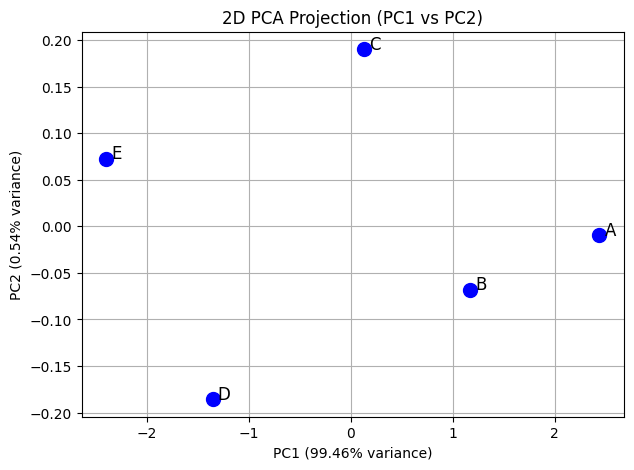

In [4]:
# --- Step 8: Visualize (2D plot: PC1 vs PC2) ---

# import matplotlib.pylot as plt

import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.scatter(pca_df['PC1'], pca_df['PC2'], color='blue', s=100)

# Add labels for each point
for i, txt in enumerate(pca_df.index):
    plt.text(pca_df['PC1'][i] + 0.05, pca_df['PC2'][i], txt, fontsize=12)

plt.title("2D PCA Projection (PC1 vs PC2)")
plt.xlabel(f"PC1 ({variance_explained[0]:.2f}% variance)")
plt.ylabel(f"PC2 ({variance_explained[1]:.2f}% variance)")
plt.grid(True)
plt.show()